# Local Diabatic Representation (LDR) dynamics with the PyTorch solver

## Table of Content <a name="TOC"></a>

1. [General setups](#1)
2. [Model Hamiltonians](#2)
3. [Arrange nuclear grids and electronic quantities](#3)
4. [Running calculations](#4)
5. [Plotting the results](#5)

    5.1. [Plotting populations and energies](#5.1)

    5.2. [Plotting td coefficients](#5.2)

### A. Learning objectives

- to define the model Hamiltonian suitable for the LDR solver
- to setup and execute a LDR dynamics calculation for 1D Hamiltonians using the LDR solver written with PyTorch
- to plot populations, energies, etc. 


### B. Use cases

- [Plot 1D PES](#)

### C. Functions

- `libra_py`
  - `dynamics_plotting`
    - [`plot_surfaces`](#plot_surfaces-1) 
  - `models`     
     - `Holstein`
       - [`Holstein2`](#Holstein2-1)
     - `Tully`
       - [`Tully1`](#Tully1-1)
       - [`Tully2`](#Tully2-1)
       - [`Tully3`](#Tully3-1)

### D. Classes and class members

- `libra_py`
  - `dynamics`
    - `ldr_torch`
      - `compute`

## 1. General setups 
<a name="1"></a>[Back to TOC](#TOC)

In [1]:
import numpy as np
import torch

from liblibra_core import *
import libra_py.dynamics.ldr_torch.compute as compute
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.animation as animation

import libra_py.models.Holstein as Holstein
import libra_py.models.Tully as Tully
from libra_py import dynamics_plotting

colors = {}
colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   
colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      
colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  
colors.update({"41": "#2F4F4F"})  # darkslategray
colors.update({"51": "#000000"}) 

clrs_index = ["11", "21", "31", "41", "12", "22", "32", "13","23", "14", "24"]

plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=24)      # fontsize of the x and y labels
plt.rc('legend', fontsize=24)     # legend fontsize
plt.rc('xtick', labelsize=24)    # fontsize of the tick labels
plt.rc('ytick', labelsize=24)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for std::vector<std::vector<float, std::allocator<float> >, std::allocator<std::vector<float, std::allocator<float> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:241: RuntimeWar

## 2. Model Hamiltonians
<a name="2"></a>[Back to TOC](#TOC)

Here, we set the model Hamiltonian system for the LDR dynamics

In [2]:
def compute_model(q, params, full_id):

    model = params["model"]
    res = None
    
    if model==1:        
        res = Holstein.Holstein2(q, params, full_id)
    elif model==2:
        res = Tully.Tully1(q, params, full_id)
    elif model==3:
        res = Tully.Tully2(q, params, full_id)
    elif model==4:
        res = Tully.Tully3(q, params, full_id)
    else:
        pass          

    return res

In [3]:
model_params1 = {"model":1, "model0":1, "nstates":2, "E_n":[0.0,  0.0], "x_n":[0.0,  2.5],"k_n":[0.002, 0.005],"V":0.001} # Holstein
model_params2 = {"model":2, "model0":2, "nstates":2} # SAC
model_params3 = {"model":3, "model0":3, "nstates":2} # DAC
model_params4 = {"model":4, "model0":4, "nstates":2} # ECWR

all_model_params = [model_params1, model_params2, model_params3, model_params4]

In [4]:
model_indx = 3

model_params = all_model_params[model_indx]

We can visualize the PES here.

In [5]:
# New plotting:
# Common setups
plot_params = {"figsize":[24, 6], "titlesize":24, "labelsize":28, "fontsize": 28, "xticksize":26, "yticksize":26,
               "colors": colors, "clrs_index": clrs_index,
               "prefix":F"case", "save_figures":0, "do_show":1,
               "plotting_option":1, "nac_idof":0 }

<Figure size 640x480 with 0 Axes>

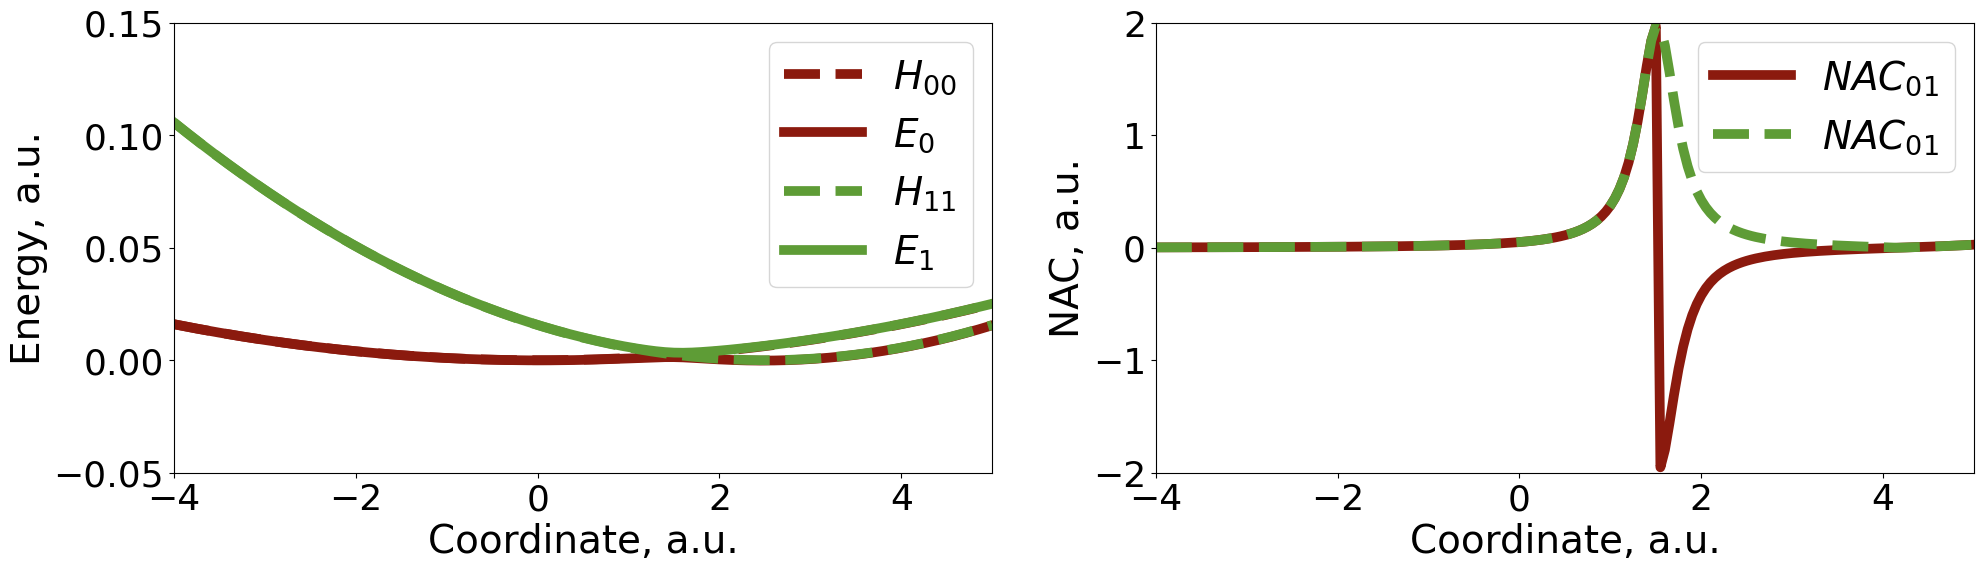

In [6]:
plot_params.update( { "xlim":[-4, 5], "ylim":[-0.01*5, 0.03*5], "ylim2":[-2, 2], "show_nac_abs":1 })
dynamics_plotting.plot_surfaces(compute_model, [ model_params1 ], [0,1], -4.0, 5.0, 0.05, plot_params)

<Figure size 640x480 with 0 Axes>

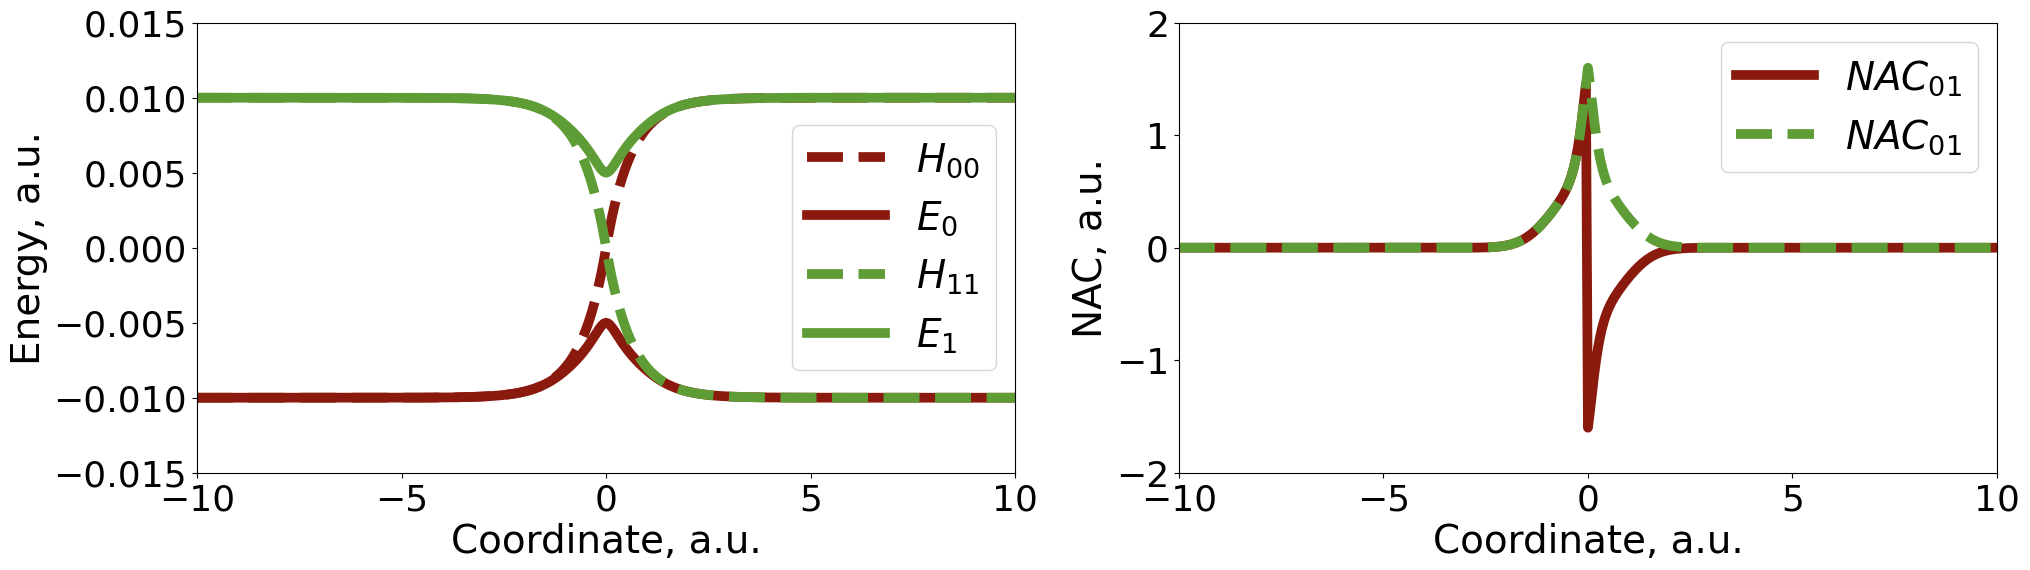

In [7]:
plot_params.update( { "xlim":[-10, 10], "ylim":[-0.015, 0.015], "ylim2":[-2, 2], "show_nac_abs":1 })
dynamics_plotting.plot_surfaces(compute_model, [ model_params2 ], [0,1], -10.0, 10.0, 0.05, plot_params)

<Figure size 640x480 with 0 Axes>

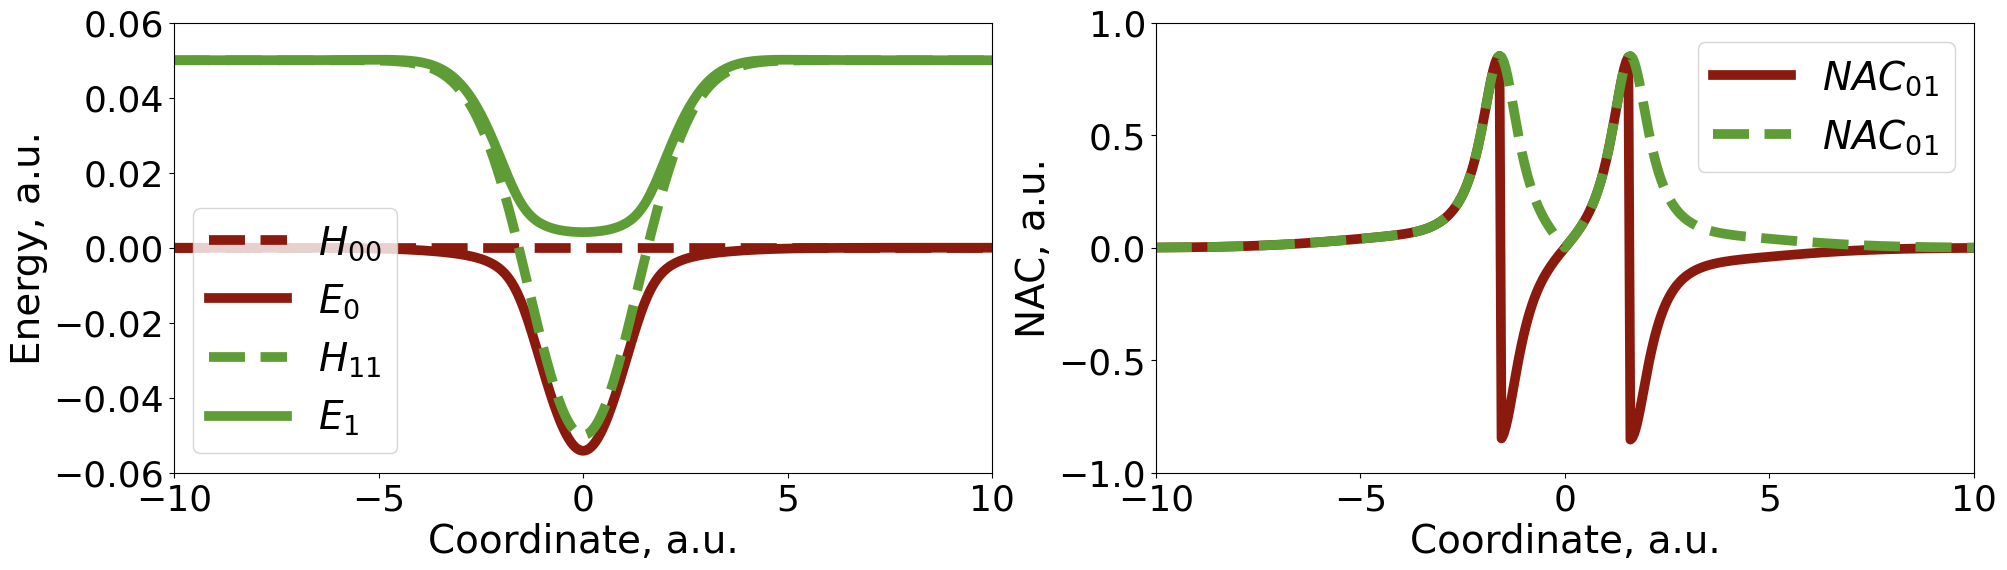

In [8]:
plot_params.update( { "xlim":[-10, 10], "ylim":[-0.06, 0.06], "ylim2":[-1, 1], "show_nac_abs":1 })
dynamics_plotting.plot_surfaces(compute_model, [ model_params3 ], [0,1], -10.0, 10.0, 0.05, plot_params)

<Figure size 640x480 with 0 Axes>

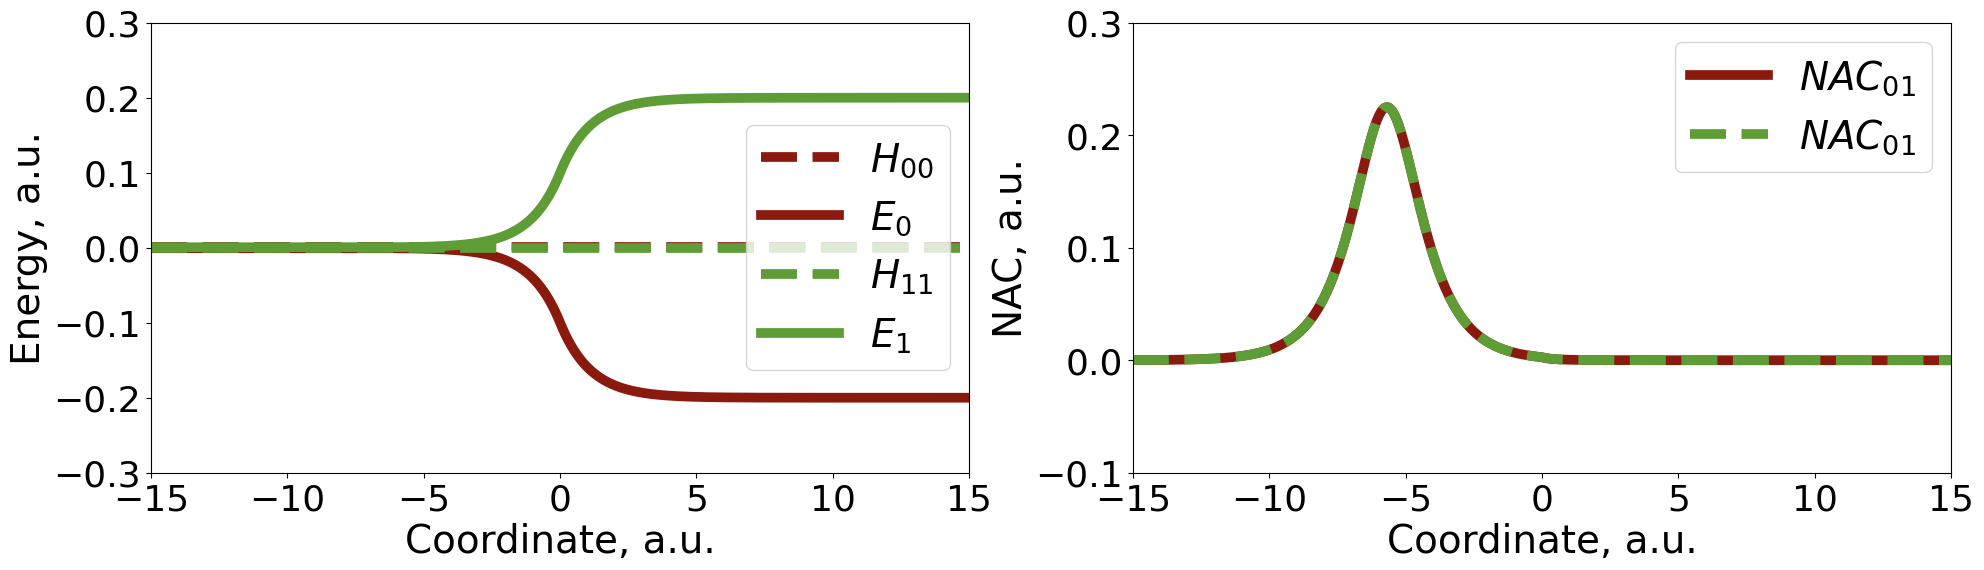

In [9]:
plot_params.update( { "xlim":[-15, 15], "ylim":[-0.3, 0.3], "ylim2":[-0.1, 0.3], "show_nac_abs":1 })
dynamics_plotting.plot_surfaces(compute_model, [ model_params4 ], [0,1], -15.0, 15.0, 0.05, plot_params)

## 3. Arrange nuclear grids and electronic quantities
<a name="3"></a>[Back to TOC](#TOC)

We need to define a nuclear grid that serves as the centers of our Gaussian basis functions, $N_{\alpha}\exp(-\alpha (q-q_{0})^{2})$. This grid is given as a 2D list with the shape (number of grid points, number of nuclear degrees of freedom). The grid setting can be flexible [Xie, Y. et al. J. Chem. Theory Comput. 2024, 20 (21), 9512–9521.]. Here, we use a uniform grid.

In [10]:
if model_indx == 0:
    dx = 0.05; alpha = 1/(2.*dx**2)
    qgrid = [[-8.0 + i * dx] for i in range(int((8. - (-8.)) / dx) + 1)]
elif model_indx == 1:
    dx = 0.05; alpha = 1/(2.*dx**2)
    qgrid = [[-10.0 + i * dx] for i in range(int((11. - (-11.)) / dx) + 1)]
elif model_indx == 2:
    dx = 0.05; alpha = 1/(2.*dx**2)
    qgrid = [[-10.0 + i * dx] for i in range(int((11. - (-11.)) / dx) + 1)]
elif model_indx == 3:
    dx = 0.05; alpha = 1/(2.*dx**2)
    qgrid = [[-30.0 + i * dx] for i in range(int((60. - (-30.)) / dx) + 1)]

For a given grid, we compute the electronic energies and overlaps. The electronic energies over the grid are stored in a tensor with dimension of (`model_params["nstates"]`, `len(qgrid)`), while the electronic overlap is reshaped into a supermatrix with dimension of (`model_params["nstates"]*len(qgrid)` ,`model_params["nstates"]*len(qgrid)`).

First, let's define `potential` function to give diabatic Hamiltonian and diagonalizing routine.

In [11]:
def potential(q, params):
    full_id = Py2Cpp_int([0,0]) 
    
    return compute_model(q, params, full_id)

In [12]:
def diagonalize_H(_model_params, q):
    nst = _model_params["nstates"]
    res = potential(q, _model_params)

    # Initialize a diabatic model Hamiltonian 
    H = torch.zeros((nst, nst), dtype=torch.complex128)

    # Fill the Hamiltonian with values from res.ham_dia
    for i in range(nst):
        for j in range(nst):
            H[i, j] = res.ham_dia.get(i, j)  # Assuming this returns a complex number

    # Diagonalize the Hamiltonian
    E, U = torch.linalg.eig(H)

    # Sort eigenvalues and reorder eigenvectors
    idx = torch.argsort(E.real)  # sort by real parts
    E = E[idx]
    U = U[:, idx]

    return H, U, E

Then we collect the electronic components.

In [13]:
def build_Selec_and_E(elec_data, device=None):
    """
    Constructs Selec and E from adiabatic data.

    Returns:
        E:      (nstates, ngrids) real-valued energies
        Selec:  (nstates*ngrids, nstates*ngrids) complex-valued Hermitian matrix
    """
    ngrids = len(elec_data)
    nstates = elec_data[0]["E"].shape[0]
    #nbasis = elec_data[0]["U"].shape[0]

    # Energies with dim of (nstates, ngrids)
    E = torch.stack(
        [d["E"].detach().to(dtype=torch.float64, device=device) for d in elec_data],
        dim=1
    )

    # Eigenvectors with dim of (ngrids, nstates, nbasis)
    U = torch.stack(
        [d["U"].detach().to(dtype=torch.cdouble, device=device) for d in elec_data],
        dim=0
    ).permute(0, 2, 1).contiguous()  # now (ngrids, nstates, nbasis)

    # Compute Selec blocks via outer products
    Selec_blocks = torch.einsum('nik,mjk->nimj', U.conj(), U)  # (ngrids, nst, ngrids, nst)

    # Reshape into supermatrix, (nstates*ngrids, nstates*ngrids)
    Selec = Selec_blocks.permute(1, 0, 3, 2).contiguous().view(nstates * ngrids, nstates * ngrids)

    return E, Selec

In [14]:
# Generate electronic energies and overlaps over the nuclear grid
elec_data = []
ndof = len(qgrid[0])
nstates = model_params["nstates"]

# Loop over grid points to calculate PES and adiabatic states
q = MATRIX(ndof, 1)  # temporary nuclear position matrix

for R in qgrid:
    for idof in range(ndof):
        q.set(idof, 0, R[idof])
    
    _, U, E = diagonalize_H(model_params, q)  # returns Hamiltonian eigenvectors and eigenvalues
    elec_data.append({"U": U, "E": E})       # store U/E at this grid point

E, Selec = build_Selec_and_E(elec_data)

/tmp/ipykernel_213423/426034607.py:15: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at /pytorch/aten/src/ATen/native/Copy.cpp:307.)
  [d["E"].detach().to(dtype=torch.float64, device=device) for d in elec_data],


The collected electronic information can be visualized.

Text(0, 0.5, 'Energy')

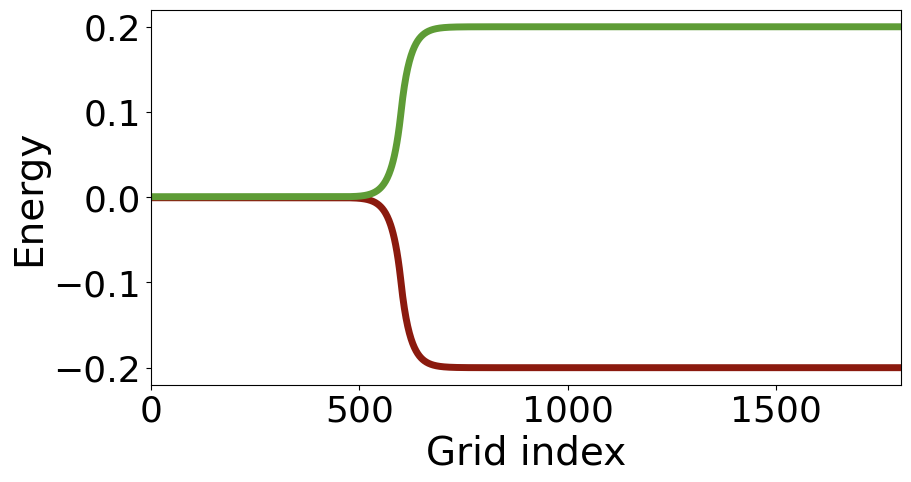

In [15]:
fig, ax = plt.subplots(figsize = (10, 5))

nstates, ngrids = E.shape
for istate in range(nstates):
    ax.plot(range(ngrids), E[istate].cpu().numpy(), color = colors[clrs_index[istate]], lw=5)
ax.margins(x=0)
ax.set_xlabel("Grid index")
ax.set_ylabel("Energy")

In [16]:
def plot_matrix(matrix, cmap="bwr", vmin=None, vmax=None):
    """
    Plot a matrix as a color map.

    Parameters:
        matrix (ndarray): 2D array to plot.
        title (str): Title of the plot.
        cmap (str): Colormap to use. e.g., 'bwr', 'viridis', 'seismic'.
        show_colorbar (bool): Whether to show the colorbar.
        vmin, vmax: Color limits.
    """
    fig, ax = plt.subplots(figsize=(6, 5))
    im = ax.imshow(matrix, cmap=cmap, interpolation='none', origin='upper', 
                    vmin=vmin, vmax=vmax)
    ax.set_xlabel("State-grid index")
    ax.set_ylabel("State-grid index")
    fig.colorbar(im)
    
    fig.tight_layout()
    

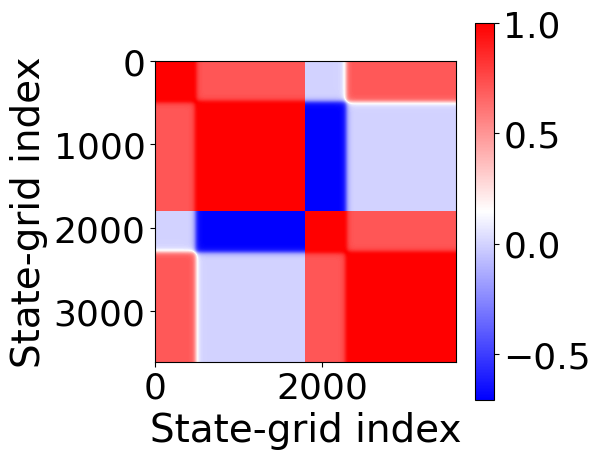

In [17]:
plot_matrix(Selec.real)

## 4. Running calculations
<a name="4"></a>[Back to TOC](#TOC)

To run the LDR dynamics, we input the initial conditions along with the nuclear grid and the electronic quantities described in the previous section.

**Initial Conditions related**

* `q0` - a position of the initial nuclear wavepacket

* `p0` - a momentum of the initial nuclear wavepacket

* `k` - a force constant of the harmonic potential determines the ground vibrational state, which serves as the initial Gaussian wavepacket

* `mass` - nuclear masses of each dof

* `istate` - an initial electronic state

**Electron-nuclear basis related**

* `qgrid` - a nuclear grid that serves as the centers of our Gaussian basis functions, (the number of grid points, nuclear dof)

* `alpha` - the width parameter of nuclear Gaussian basis functions

* `nstates` - the number of electronic states

* `E` - electronic energies over the grid with dim of (`model_params["nstates"]`, `len(qgrid)`)

* `Selec` - an electronic overlap is reshaped into a supermatrix with dim of (`model_params["nstates"]*len(qgrid)` ,`model_params["nstates"]*len(qgrid)`)

**Dynamics control related**

* `prefix` - the name of the file to which the state of the solver (and the results) will be stored

* `dt` - the integration time-step (a.u.)

* `nsteps` - for how many steps integrate the LDR propagation

* `save_every_n_steps` - how many steps of integration to conduct before saving the variables to the memory and eventually to the file.
            Keep in mind, since we are saving the multi-dimensional wavefunctions, which may be quite large. It is important to choose this
            parameter carefully, otherwise one may end up with the files of many Gigabiytes, if not more.
* `properties_to_save` - determines what properties to save during the dynamics.


In [18]:
ldr_params_Holstein = {"q0": [-4.0], "p0": [0.0], "k": [0.01], "mass": [2000.0], "istate": 0,
                       "qgrid": qgrid, "alpha": [alpha], "nstates": 2, "E": E, "Selec": Selec,
                       "nsteps": 1600, "dt": 5.0, "save_every_n_steps": 10, "prefix": "Holstein-solution",
                       "properties_to_save": ["time", "population_right", "kinetic_energy", "potential_energy", "total_energy", "norm", "C_save"]}

ldr_params_SAC = {"q0": [-6.0], "p0": [15.0], "k": [0.01], "mass": [2000.0], "istate": 0,
                       "qgrid": qgrid, "alpha": [alpha], "nstates": 2, "E": E, "Selec": Selec,
                       "nsteps": 300, "dt": 5.0, "save_every_n_steps": 10, "prefix": "SAC-solution",
                       "properties_to_save": ["time", "population_right", "kinetic_energy", "potential_energy", "total_energy", "norm", "C_save"]}

ldr_params_DAC = {"q0": [-6.0], "p0": [15.0], "k": [0.01], "mass": [2000.0], "istate": 0,
                       "qgrid": qgrid, "alpha": [alpha], "nstates": 2, "E": E, "Selec": Selec,
                       "nsteps": 300, "dt": 5.0, "save_every_n_steps": 10, "prefix": "DAC-solution",
                       "properties_to_save": ["time", "population_right", "kinetic_energy", "potential_energy", "total_energy", "norm", "C_save"]}

ldr_params_ECWR = {"q0": [-15.0], "p0": [26.0], "k": [0.01], "mass": [2000.0], "istate": 0,
                       "qgrid": qgrid, "alpha": [alpha], "nstates": 2, "E": E, "Selec": Selec,
                       "nsteps": 700, "dt": 5.0, "save_every_n_steps": 10, "prefix": "ECWR-solution",
                       "properties_to_save": ["time", "population_right", "kinetic_energy", "potential_energy", "total_energy", "norm", "C_save"]}

all_ldr_params = [ldr_params_Holstein, ldr_params_SAC, ldr_params_DAC, ldr_params_ECWR]

ldr_params = dict(all_ldr_params[model_indx])

In [19]:
solver = compute.ldr_solver(ldr_params)
solver.solve()

Building overlap and Hamiltonian matrices
Computing the time propagator
Initializing Coefficients
Propagating Coefficients
step = 0
step = 10
step = 20
step = 30
step = 40
step = 50
step = 60
step = 70
step = 80
step = 90
step = 100
step = 110
step = 120
step = 130
step = 140
step = 150
step = 160
step = 170
step = 180
step = 190
step = 200
step = 210
step = 220
step = 230
step = 240
step = 250
step = 260
step = 270
step = 280
step = 290
step = 300
step = 310
step = 320
step = 330
step = 340
step = 350
step = 360
step = 370
step = 380
step = 390
step = 400
step = 410
step = 420
step = 430
step = 440
step = 450
step = 460
step = 470
step = 480
step = 490
step = 500
step = 510
step = 520
step = 530
step = 540
step = 550
step = 560
step = 570
step = 580
step = 590
step = 600
step = 610
step = 620
step = 630
step = 640
step = 650
step = 660
step = 670
step = 680
step = 690


## 5. Plotting the results
<a name="5"></a>[Back to TOC](#TOC)

In [20]:
f = torch.load(F"{ldr_params['prefix']}.pt")
time, norm, ekin, epot, etot = f["time"], f["norm"], f["kinetic_energy"], f["potential_energy"], f["total_energy"]
pop = f["population_right"]
Snucl, S, H, U = f["Snucl"], f["S"], f["H"], f["U"]
C_save = f["C_save"]

### 5.1. Plotting populations and energies
<a name="5.1"></a>[Back to TOC](#TOC)

Text(0, 0.5, 'Population')

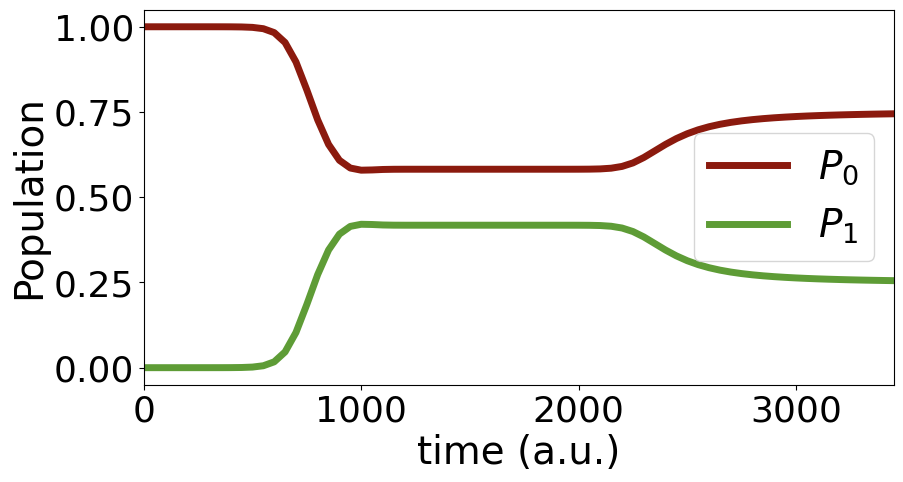

In [21]:
fig, ax = plt.subplots(figsize=(10,5))

pop = np.array(pop)

ax.margins(x=0)
ax.plot(time, pop[:,0], color=colors["11"], label=r"$P_{0}$", lw=5)
ax.plot(time, pop[:,1], color=colors["21"], label=r"$P_{1}$", lw=5)
ax.legend()
ax.set_xlabel("time (a.u.)")
ax.set_ylabel("Population")

Text(0, 0.5, 'Energy (Ha)')

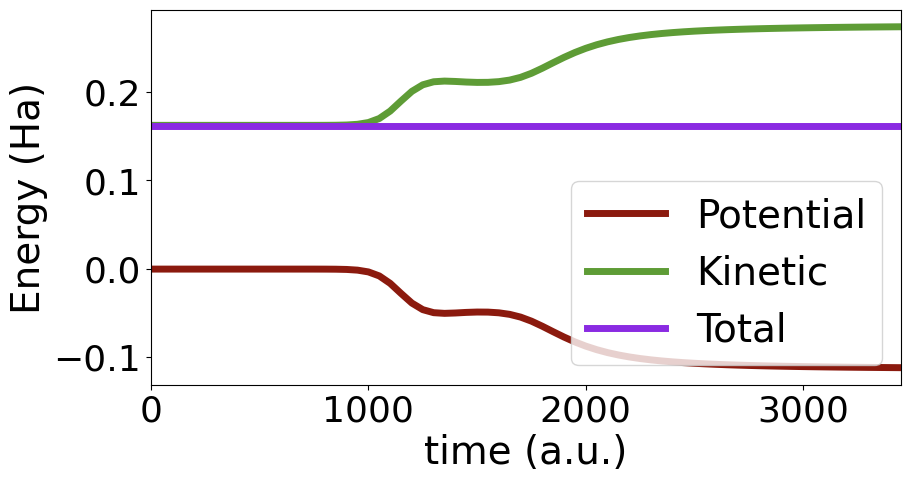

In [22]:
fig, ax = plt.subplots(figsize=(10,5))

pop = np.array(pop)

ax.margins(x=0)
ax.plot(time, epot, color=colors["11"], label="Potential", lw=5)
ax.plot(time, ekin, color=colors["21"], label="Kinetic", lw=5)
ax.plot(time, etot, color=colors["31"], label="Total", lw=5)
ax.legend()
ax.set_xlabel("time (a.u.)")
ax.set_ylabel("Energy (Ha)")

### 5.2. Plotting td coefficients
<a name="5.2"></a>[Back to TOC](#TOC)

In [23]:
def plot_C_propagation(prefix, time, C_save, time_interval=100):

    C_temp = np.array(C_save)

    y_re_min, y_re_max = np.min(C_temp.real), np.max(C_temp.real)
    y_im_min, y_im_max = np.min(C_temp.imag), np.max(C_temp.imag)
    dy_re, dy_im = (y_re_max - y_re_min)*0.01, (y_im_max - y_im_min)*0.01
    
    frames = len(time)

    fig, axs = plt.subplots(ncols=2, figsize=(12,5))

    def update(i):
        axs[0].clear()
        axs[0].set_ylim(y_re_min - dy_re, y_re_max + dy_re)
        axs[0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
        axs[0].set_xlabel("State-grid index")
        axs[0].set_title(r"$\Re [C]$")
        axs[0].plot(C_save[i].real, color="r", lw=1)
        axs[0].margins(x=0)
        axs[0].text(0.95, 0.95, rF"$t=$ {time[i]} a.u.", transform=axs[0].transAxes,
        fontsize=20, verticalalignment='top', horizontalalignment='right')
        
        axs[1].clear()
        axs[1].set_ylim(y_im_min - dy_im, y_im_max + dy_im)
        axs[1].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
        axs[1].set_xlabel("State-grid index")
        axs[1].set_title(r"$\Im [C]$")
        axs[1].plot(C_save[i].imag, color="b", lw=1)
        axs[1].margins(x=0)
        
        fig.tight_layout()

    ani = animation.FuncAnimation(fig, update, frames=frames, interval=time_interval)
    ani.save(F"{prefix}-movie.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


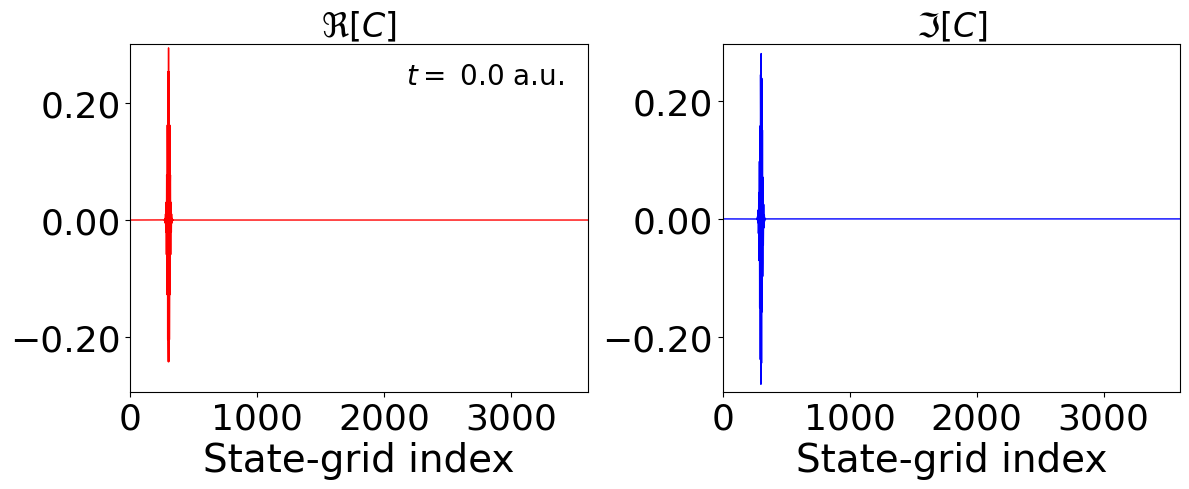

In [24]:
plot_C_propagation(ldr_params["prefix"], time, C_save)

### Exercise
Try to use different `qgrid` and see if the same LDR results are reproduced.